<a href="https://colab.research.google.com/github/RomanMykolaichuk/nlp2021/blob/master/Lections/Lection6/lection6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [8]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [9]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=5234, text='Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube', target=0)
Pandas(Index=5329, text='Proud of you @JoeGoodmanJr for watching the #CopaLibertadores and the Argentinean pandemonium... https://t.co/8tyGO0KiZz', target=0)
Pandas(Index=5625, text='reaad/ plsss 12000 Nigerian refugees repatriated from Cameroon', target=1)
Pandas(Index=4118, text='Those that I have sworn to defend have proven themselves to be friends of the House Hailstorm.', target=0)


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [11]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [12]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [13]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [15]:
text_vectorizer.adapt(train_sentences)

In [16]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [17]:
words = text_vectorizer.get_vocabulary()



In [18]:
from tensorflow.keras.layers import Embedding

In [19]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [20]:
embedding

In [21]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.00186578, -0.00111235, -0.0161461 , ...,  0.0130241 ,
        -0.01602163, -0.02017379],
       [-0.02424983, -0.0019444 , -0.0303718 , ..., -0.03890472,
        -0.00348383,  0.00813032],
       [ 0.01404073, -0.00655632,  0.01343739, ...,  0.01966048,
         0.02575684, -0.02391165],
       ...,
       [ 0.00720806,  0.02347651, -0.04895843, ..., -0.04170927,
        -0.02687543,  0.03768331],
       [ 0.00720806,  0.02347651, -0.04895843, ..., -0.04170927,
        -0.02687543,  0.03768331],
       [ 0.00720806,  0.02347651, -0.04895843, ..., -0.04170927,
        -0.02687543,  0.03768331]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

### 3.1 Some imports

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### 3.2 Preprocessing

In [24]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [25]:
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [27]:
y_hat0=model_0.predict(test_sentences)

In [28]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1]))

3.3 Evaluate metrics function

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [30]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'f1': 0.8032877870568117,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388}

In [31]:
test_sentences.dtype

dtype('O')

3.4 Modeling

In [32]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [33]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [35]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6124 - accuracy: 0.6945 - val_loss: 0.5208 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4444 - accuracy: 0.8187 - val_loss: 0.4425 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3500 - accuracy: 0.8591 - val_loss: 0.4221 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2863 - accuracy: 0.8894 - val_loss: 0.4301 - val_accuracy: 0.8018
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2398 - accuracy: 0.9113 - val_loss: 0.4394 - val_accuracy: 0.8058


In [36]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8058


[0.4393965005874634, 0.8057742714881897]

In [37]:
res_model_1=pd.DataFrame(model_1_history.history)

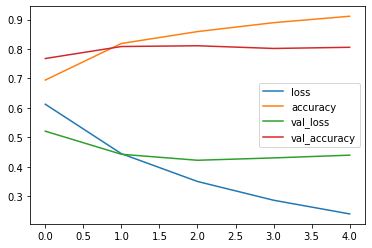

In [38]:
res_model_1.plot()

In [39]:
test_labels.shape

(762,)

In [40]:
y_hat1=model_1.predict(test_sentences)

In [41]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [42]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [43]:
calculate_results(test_labels,y_hat1)

{'accuracy': 80.5774278215223,
 'f1': 0.8033180834080721,
 'precision': 0.805540297052434,
 'recall': 0.8057742782152231}

In [44]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'f1': 0.8032877870568117,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 4 start

In [45]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [46]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [47]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [48]:
model_2_history = model_2.fit(
                                train_sentences,train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels)
)

Epoch 1/5
215/215 [==============================] - 8s 14ms/step - loss: 0.2273 - accuracy: 0.9169 - val_loss: 0.5320 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1583 - accuracy: 0.9415 - val_loss: 0.5938 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1260 - accuracy: 0.9539 - val_loss: 0.6066 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1063 - accuracy: 0.9599 - val_loss: 0.6563 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0874 - accuracy: 0.9650 - val_loss: 0.8133 - val_accuracy: 0.7835


In [49]:
model_2.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8133 - accuracy: 0.7835


[0.8132559657096863, 0.7834645509719849]

In [50]:
y_hat2=model_2.predict(test_sentences)

y_hat2[:10]

array([[9.9111348e-01],
       [6.7372185e-01],
       [3.3570681e-04],
       [2.7087671e-01],
       [2.8744861e-01],
       [2.0172262e-01],
       [1.3149723e-01],
       [7.6516747e-02],
       [4.7743949e-01],
       [9.9976546e-01]], dtype=float32)

In [51]:
y_hat2=tf.squeeze(tf.round(y_hat2))

y_hat2

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0

In [52]:
calculate_results(test_labels,y_hat2),calculate_results(test_labels,y_hat1),calculate_results(test_labels,y_hat0)

({'accuracy': 78.34645669291339,
  'f1': 0.7817677208860474,
  'precision': 0.7821070248118857,
  'recall': 0.7834645669291339},
 {'accuracy': 80.5774278215223,
  'f1': 0.8033180834080721,
  'precision': 0.805540297052434,
  'recall': 0.8057742782152231},
 {'accuracy': 80.97112860892388,
  'f1': 0.8032877870568117,
  'precision': 0.8184785838596061,
  'recall': 0.8097112860892388})

In [53]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [54]:
model_3.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [55]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [56]:
model_3.fit(train_sentences,train_labels, 
            epochs=5, 
            validation_data=(test_sentences,test_labels)           

)

Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.1623 - accuracy: 0.9361 - val_loss: 0.6474 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0827 - accuracy: 0.9704 - val_loss: 0.7496 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0739 - accuracy: 0.9721 - val_loss: 0.7483 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0671 - accuracy: 0.9721 - val_loss: 0.7971 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0557 - accuracy: 0.9769 - val_loss: 1.0014 - val_accuracy: 0.7717


In [57]:
model_3.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.0014 - accuracy: 0.7717


[1.0014420747756958, 0.7716535329818726]

In [58]:
y_hat3 = model_3.predict(test_sentences)

y_hat3[:10]

array([[9.9959522e-01],
       [9.6257985e-01],
       [3.8415419e-05],
       [2.1331334e-02],
       [6.0115957e-01],
       [3.3112270e-01],
       [2.0477418e-02],
       [7.0425846e-02],
       [3.5598256e-02],
       [9.9982530e-01]], dtype=float32)

In [59]:
y_hat3=tf.squeeze(tf.round(y_hat3))

y_hat3

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [60]:
calculate_results(test_labels,y_hat3)

{'accuracy': 77.16535433070865,
 'f1': 0.7676089045040257,
 'precision': 0.7711878343451344,
 'recall': 0.7716535433070866}

In [61]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(16))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional_LSTM")

(None, 15, 128)
(None, 32)


In [62]:
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [63]:
model_4.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 32)               18560     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,298,593
Trainable params

In [64]:
model_4.fit(train_sentences,train_labels,epochs=5, 
validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 8s 19ms/step - loss: 0.1582 - accuracy: 0.9628 - val_loss: 0.7440 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0655 - accuracy: 0.9746 - val_loss: 0.8499 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0528 - accuracy: 0.9784 - val_loss: 0.9613 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0447 - accuracy: 0.9799 - val_loss: 1.0730 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0405 - accuracy: 0.9819 - val_loss: 1.1881 - val_accuracy: 0.7467


In [65]:
model_4.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 7ms/step - loss: 1.1881 - accuracy: 0.7467


[1.188140869140625, 0.7467191815376282]

In [66]:
y_hat4 = model_4.predict(test_sentences)

In [67]:
y_hat4=tf.squeeze(tf.round(y_hat4))

y_hat4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1.], dtype=float32)>

In [68]:
calculate_results(test_labels,y_hat4)

{'accuracy': 74.67191601049869,
 'f1': 0.7458533472577782,
 'precision': 0.7454298059385365,
 'recall': 0.7467191601049868}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 5 start

In [69]:
tf.random.set_seed(49)

from tensorflow.keras import layers

In [70]:
model_5embedding = layers.Embedding(input_dim=10000, 
                                    output_dim=128, 
                                    embeddings_initializer="uniform", 
                                    input_length=15, 
                                    name="embedding_5")

In [71]:
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x= model_5embedding(x)
x= layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")


In [72]:
model_5.compile(
            loss="binary_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=["accuracy"]
)

In [73]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [74]:
model_5_history= model_5.fit(
    train_sentences,train_labels, epochs=5, validation_data=(test_sentences, test_labels)
)

Epoch 1/5
215/215 [==============================] - 28s 9ms/step - loss: 0.5629 - accuracy: 0.7190 - val_loss: 0.4354 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3407 - accuracy: 0.8578 - val_loss: 0.4342 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2103 - accuracy: 0.9223 - val_loss: 0.4987 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1339 - accuracy: 0.9581 - val_loss: 0.5580 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0940 - accuracy: 0.9702 - val_loss: 0.5978 - val_accuracy: 0.7887


In [75]:
y_hat5=model_5.predict(test_sentences)

y_hat5[:10]

array([[0.9873378 ],
       [0.3018928 ],
       [0.29270282],
       [0.8261368 ],
       [0.81605434],
       [0.01390425],
       [0.05401121],
       [0.10331525],
       [0.7631881 ],
       [0.9999974 ]], dtype=float32)

In [76]:
y_hat5=tf.squeeze(tf.round(y_hat5))

y_hat5[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 1.], dtype=float32)>

In [77]:
calculate_results(y_true=test_labels, y_pred=y_hat5)

{'accuracy': 78.87139107611549,
 'f1': 0.7874783506734244,
 'precision': 0.7874771155108337,
 'recall': 0.7887139107611548}

In [78]:
import tensorflow_hub as hub
url="https://tfhub.dev/google/universal-sentence-encoder/4"

sentence_encoder_layer = hub.KerasLayer(url,input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [79]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [80]:
model_6.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)


In [81]:
model_6_history=model_6.fit(train_sentences,train_labels,epochs=5,
                        validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 8s 23ms/step - loss: 0.5096 - accuracy: 0.7822 - val_loss: 0.4186 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4191 - accuracy: 0.8145 - val_loss: 0.4022 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4045 - accuracy: 0.8234 - val_loss: 0.3972 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.3959 - accuracy: 0.8243 - val_loss: 0.3987 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3874 - accuracy: 0.8311 - val_loss: 0.3973 - val_accuracy: 0.8150


In [82]:
y_hat6=model_6.predict(test_sentences)

y_hat6[:10]

array([[0.89597076],
       [0.15770358],
       [0.1056202 ],
       [0.37231955],
       [0.07096256],
       [0.10896576],
       [0.31769684],
       [0.10559951],
       [0.52261204],
       [0.97176784]], dtype=float32)

In [83]:
y_hat6=tf.squeeze(tf.round(y_hat6))

y_hat6[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [84]:
calculate_results(test_labels,y_hat6)

{'accuracy': 81.49606299212599,
 'f1': 0.8138785555587134,
 'precision': 0.8140768036413563,
 'recall': 0.8149606299212598}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 6 start

In [90]:
url

'https://tfhub.dev/google/universal-sentence-encoder/4'

In [85]:
tf_hub_embedding_layer = hub.KerasLayer(url,input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=True, 
                                        name="USE-FT")

In [86]:
model_7 = tf.keras.Sequential([
  tf_hub_embedding_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_7_USE_fine_tuning")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_7.summary()

Model: "model_7_USE_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE-FT (KerasLayer)         (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 256,830,721
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_7_history=model_7.fit(train_sentences,train_labels,epochs=2,
                        validation_data=(test_sentences,test_labels))

Epoch 1/2
215/215 [==============================] - 58s 239ms/step - loss: 0.4496 - accuracy: 0.7974 - val_loss: 0.3975 - val_accuracy: 0.8163
Epoch 2/2
215/215 [==============================] - 51s 236ms/step - loss: 0.2327 - accuracy: 0.9114 - val_loss: 0.4680 - val_accuracy: 0.8071


In [88]:
y_hat7=model_7.predict(test_sentences)
y_hat7=tf.squeeze(tf.round(y_hat7))
calculate_results(test_labels,y_hat7)

{'accuracy': 80.70866141732283,
 'f1': 0.8076227469426757,
 'precision': 0.8086327155957768,
 'recall': 0.8070866141732284}

In [93]:
for layer_number , layer in enumerate(model_7.layers):
  print(layer_number, layer.name, layer.trainable)

0 USE-FT True
1 dense_7 True
2 dense_8 True


In [107]:
tf_hub_embedding_layer.trainable=False

In [108]:
model_7.summary()

Model: "model_7_USE_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE-FT (KerasLayer)         (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [109]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [110]:
model_7.summary()

Model: "model_7_USE_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE-FT (KerasLayer)         (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [111]:
model_7_history2=model_7.fit(train_sentences,train_labels,epochs=5,
                        validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 6s 23ms/step - loss: 0.0620 - accuracy: 0.9801 - val_loss: 0.5997 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.6112 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.6116 - val_accuracy: 0.8018
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.6190 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.7082 - val_accuracy: 0.7756


In [113]:
tf_hub_embedding_layer.trainable=True

In [116]:
model_7.summary()

Model: "model_7_USE_fine_tuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE-FT (KerasLayer)         (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 256,830,721
Non-trainable params: 0
_________________________________________________________________


In [117]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [118]:
model_7_history2=model_7.fit(train_sentences,train_labels,epochs=7,
                             initial_epoch=3,
                        validation_data=(test_sentences,test_labels))

Epoch 4/7
215/215 [==============================] - 57s 239ms/step - loss: 0.0821 - accuracy: 0.9750 - val_loss: 0.5543 - val_accuracy: 0.7979
Epoch 5/7
215/215 [==============================] - 51s 237ms/step - loss: 0.0425 - accuracy: 0.9842 - val_loss: 0.6220 - val_accuracy: 0.7940
Epoch 6/7
215/215 [==============================] - 51s 236ms/step - loss: 0.0269 - accuracy: 0.9891 - val_loss: 0.6915 - val_accuracy: 0.7953
Epoch 7/7
215/215 [==============================] - 51s 235ms/step - loss: 0.0246 - accuracy: 0.9904 - val_loss: 0.6309 - val_accuracy: 0.8005


In [ ]:
model_7_history2=model_7.fit(train_sentences,train_labels,epochs=8,
                             initial_epoch=7,
                        validation_data=(test_sentences,test_labels))

Epoch 8/8
215/215 [==============================] - 51s 236ms/step - loss: 0.0177 - accuracy: 0.9926 - val_loss: 0.7229 - val_accuracy: 0.7835
